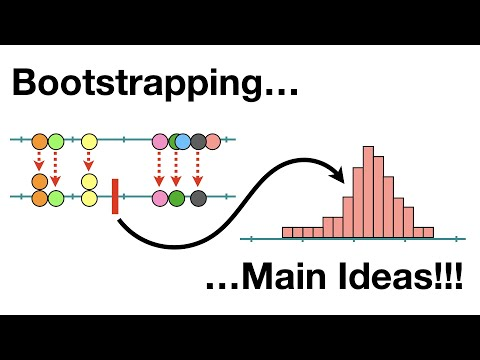

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

## 1

The standard error of the mean is equivalent to the standard distribution of the bootstrapped means, which can be calculated by resampling the original sample many times (bootstrapping) and finding the standard distribution of the resampled samples' means, which measures how spread out the bootstrapped means are from the mean mean. On the other hand, the standard distribution of the original sample is simply how spread out the data points are from the sample mean.

## 2

A 95% confidence interval refers to the range that covers 95% of the bootstrapped sample means. When a 95% confidence interval is computed for many different samples that are taken from a population, the population mean will be within the 95% confidence interval of 95% of the samples. If the distribution of the bootstrapped means is a normal distribution, a 95% confidence interval would mean a Z score of 1.96 (95% of the data is within 1.96 standard deviations of the mean). The margin of error, or ME should then be calculated using the formula ME = Z * SEM (where Z is the Z score and SEM is standard error of the mean). The margin of error represents the uncertainty in estimating a parameter of a population using a sample. Since the Z score for a 95% confidence interval is 1.96, the ME would be 1.96 * SEM. The confidence interval will have a range 2 * ME centered on the mean of the bootstrapped sample means (one margin of error on each side of the mean).

https://chatgpt.com/share/66f888c9-3300-8013-80f7-5b7d9fc5912e

## 3

To create a 95% confidence interval without using the standard deviation, you could calculate the mean value of the bootstrapped sample means and then try setting a boundary on both sides of the mean, with both boundaries being the same distance away from the mean. If the boundaries contain less than 95% of the data, then the boundaries can be moved further out, and if they contain more than 95% then they can be moved further in, until the roughly 95% of the data is contained within the boundaries (the boundaries represent the 95% confidence interval)

## 4

95% Confidence Interval for the population mean: [ 99.39126742 101.21824545]


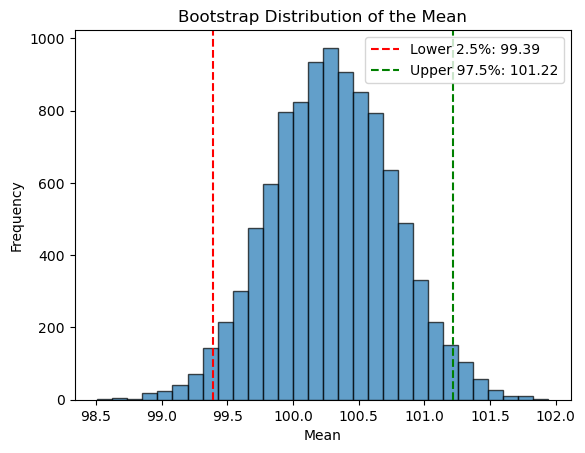

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate sample data
np.random.seed(42)
data = np.random.normal(loc=100, scale=15, size=1000)  # Normal distribution with mean=100, std=15, sample size=1000

# Step 2: Define a bootstrap function
def bootstrap_mean(data, n_bootstraps=10000):
    """Generate bootstrap replicates of the mean."""
    boot_means = np.empty(n_bootstraps) # Can be renamed to something else depending on the parameter, e.g. boot_medians
    for i in range(n_bootstraps):
        boot_sample = np.random.choice(data, size=len(data), replace=True)
        boot_means[i] = np.mean(boot_sample) # Should be changed depending on the parameter, 
                                             # e.g. boot_medians[i] = np.median(boot_sample)
    return boot_means # Should be renamed to the new variable name

# Step 3: Perform the bootstrap
n_bootstraps = 10000 # Number of bootstrap samples
boot_means = bootstrap_mean(data, n_bootstraps=n_bootstraps) # Rename boot_means to the new variable name

# Step 4: Calculate 95% confidence interval
confidence_interval = np.percentile(boot_means, [2.5, 97.5]) # Between 2.5% and 97.5%

# Step 5: Print the confidence interval
print(f"95% Confidence Interval for the population mean: {confidence_interval}")

# Step 6: Visualize bootstrap means using PNG renderer
plt.hist(boot_means, bins=30, edgecolor='k', alpha=0.7) # Rename boot_means to the new variable name
plt.axvline(confidence_interval[0], color='red', linestyle='--', label=f'Lower 2.5%: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label=f'Upper 97.5%: {confidence_interval[1]:.2f}')
plt.title("Bootstrap Distribution of the Mean")
plt.xlabel("Mean")
plt.ylabel("Frequency")
plt.legend()

# Set the renderer to PNG explicitly
plt.savefig('bootstrap_distribution.png', format='png')
plt.show()


https://chatgpt.com/share/66f89c13-edfc-8013-9293-a3f92dae56c0

## 5

The population parameter is a parameter that is used to define the shape of the population where samples can be drawn from. On the other hand, the sample statistic is simply a statistic that describes that sample only and is not representative of the population. This means that different samples will have different sample statistics. Sample statistics can be used to estimate population parameters when used with confidence intervals. For example, for 95% of samples, their 95% confidence interval (which is centered around the sample mean, a sample statistic) will contain the population mean (which is a population parameter).

## 6

Friend: Hi, do you know what bootstrapping is? My stats homework is due on Thursday and I have no idea how it works!

Me: Well, the process of bootstrapping is actually pretty simple. First, you take a sample from a population. Next, you create many, usually thousands, of additional samples from your original sample by sampling it with replacement. The sample sizes of the new samples should be the same as the sample size of the original sample. The new samples are called bootstrapped samples.

Friend: Ok? Lemme just copy that down...

Friend: Ok I'm done. What is the main purpose of bootstrapping?

Me: Bootstrapping is used to provide an estimate of a population parameter using a sample. Basically, depending on the population parameter that you want to estimate using the bootstrapped samples, you can calculate the statistic for each bootstrapped sample and plot a histogram or KDE using them. Finally, you can create a confidence interval, for example a 95% confidence interval, for the bootstrap distribution. Assuming the confidence interval is a 95% confidence interval, for 95 samples out of a hundred, the population parameter will be within the confidence interval.

Friend: Thank you! I have one more question. So if you had a hypothesized guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your hypothesized guess might be plausible?

Me: You could try calculating a confidence interval, so maybe a 95% confidence interval, for your bootstrapped distribution. If your hypothesized guess is outside the confidence interval, it is likely to be wrong. However, with a 95% confidence interval, 5 out of 100 samples will show that the hypothesized guess is wrong, so it could be possible that your sample is not representative of the population. 

## 7

Since the confidence interval overlaps zero, that means that there is a non-negligible chance that the average result might be zero. If the average result is zero, that means that the null hypothesis is true. The observed sample mean does not have to be zero for there to be a chance for the average result to be zero, it just needs to be within a reasonable confidence interval. If the confidence interval does not contain zero, it is likely that the null hypothesis is false and can be rejected.

## 8

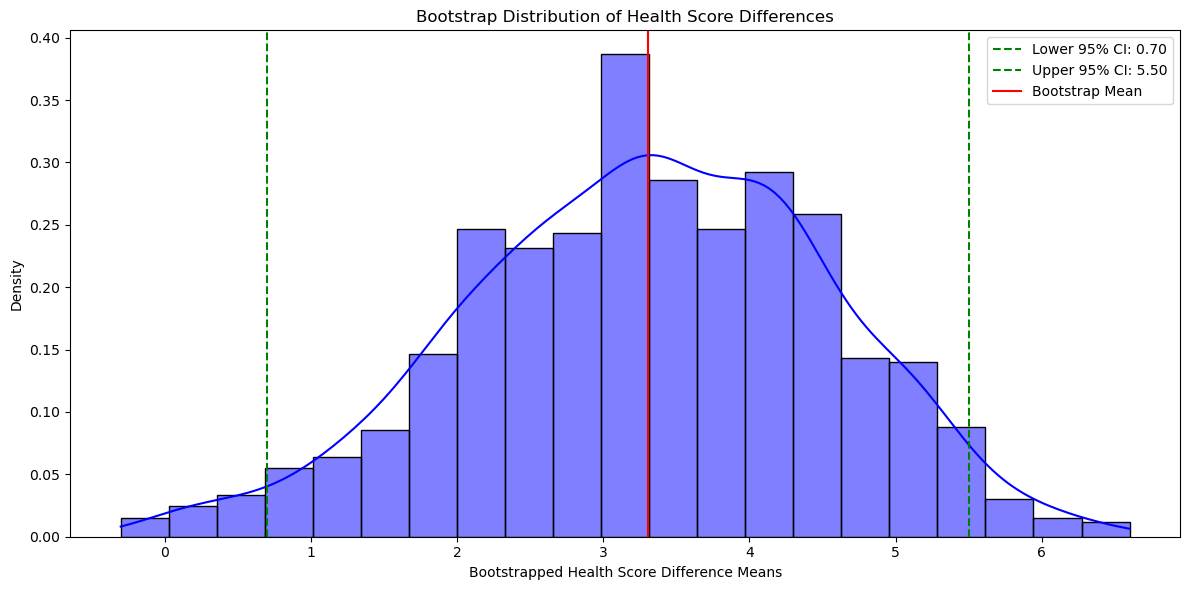

95% Confidence Interval: [0.70, 5.50]


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from HW04.csv
df = pd.read_csv('HW04.csv')

# Step 1: Calculate the difference in health scores
df['HealthScoreDiff'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Step 2: Bootstrapping to calculate the 95% confidence interval
np.random.seed(42)
bootstrap_means = []

n_bootstraps = 1000
for _ in range(n_bootstraps):
    bootstrap_sample = df['HealthScoreDiff'].sample(frac=1, replace=True)
    bootstrap_means.append(bootstrap_sample.mean())

# Calculate the 95% confidence interval
lower_ci = np.percentile(bootstrap_means, 2.5)
upper_ci = np.percentile(bootstrap_means, 97.5)

# Step 3: Plotting the raw data and the bootstrap distribution
plt.figure(figsize=(12, 6))

# Raw Data - Difference in health scores
"""
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='PatientID', y='HealthScoreDiff', hue='Gender', s=100)
plt.axhline(df['HealthScoreDiff'].mean(), color='r', linestyle='--', label='Mean Diff')
plt.title('Raw Health Score Difference')
plt.xlabel('Patient ID')
plt.ylabel('Health Score Difference')
plt.legend()

# Bootstrap Distribution with KDE
plt.subplot(1, 2, 2)"""
sns.histplot(bootstrap_means, kde=True, color='blue', stat='density')
plt.axvline(lower_ci, color='green', linestyle='--', label=f'Lower 95% CI: {lower_ci:.2f}')
plt.axvline(upper_ci, color='green', linestyle='--', label=f'Upper 95% CI: {upper_ci:.2f}')
plt.axvline(np.mean(bootstrap_means), color='red', linestyle='-', label='Bootstrap Mean')
plt.title('Bootstrap Distribution of Health Score Differences')
plt.xlabel('Bootstrapped Health Score Difference Means')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Display the confidence interval
print(f"95% Confidence Interval: [{lower_ci:.2f}, {upper_ci:.2f}]")


https://chatgpt.com/share/66fd6cd3-c2ec-8013-8e5c-9b15614785ca

The meaning of a null hypothesis is that the average result is zero, and that whatever is happening has no impact on the result. In the case of this data on the effect of vaccines on a patient's health score, the null hypothesis would mean that the vaccine had no impact on the health score. 

To determine if the null hypothesis is true, we can see if 0 lies within the 95% confidence interval of the sample data that has been provided by AliTech. Bootstrapped samples of the same sample size (10) are generated from the original sample by sampling without replacement, and their means are calculated to create a histogram, which can be seen in the diagram above. A KDE is also created from the bootstrapped means. Finally, the 95% confidence interval (the region that contains 95% of the means that is determined finding the values that are greater than 2.5% and 97.5% of the means) is calculated. For the provided sample, the 95% confidence interval is in the range 0.7 to 5.5. Since 0.7 is greater than 0, the null hypothesis is false. However, it is assumed that this sample is representative of the population regarding the effects of the vaccine on a patient's health score. It is possible that AliTech has provided a biased sample to improve public perception of their vaccine.

## 9

Somewhat